14-4

In [1]:
import re

p = re.compile(r"\d+")
print(p.findall("o1n2m3k4"))

['1', '2', '3', '4']


14-10

In [32]:
import requests
import re


def getHTMLText(url):
    try:
        headers = {"User-Agent": "ZZZ"}
        r = requests.get(url, headers=headers)
        return r.text
    except:
        print("Failed to get content.")


def parsePage(html):
    try:
        list = []
        titles = re.findall(r"data-title\=\".*?\"", html)

        for i in range(len(titles)):
            title = titles[i].split("=")[1]
            if title in list:
                pass
            else:
                list.append(title)

        return list
    except:
        print("Failed to find movie.")


if __name__ == "__main__":
    url = "https://movie.douban.com/cinema/nowplaying/shanghai/"
    html = getHTMLText(url)
    movies = parsePage(html)
    for i in movies:
        print(i)

"旺卡"
"瞒天过海"
"照明商店"
"涉过愤怒的海"
"爆裂点"
"再见，李可乐"
"河边的错误"
"我本是高山"
"拿破仑"
"热搜"
"蜡笔小新：新次元！超能力大决战"
"饥饿游戏：鸣鸟与蛇之歌"
"飞鸭向前冲"
"刀尖"
"星愿"
"红猪"
"无价之宝"
"沉默笔录"
"志愿军：雄兵出击"
"拯救嫌疑人"
"开国将帅授衔1955"
"不要走散好不好"
"傍晚向日葵"
"仲肯"
"疾速营救"
"诡摇铃"
"吾爱敦煌"
"坚如磐石"
"一个和四个"
"开山人"
"海王"
"大话西游之大圣娶亲"
"迷你特工队之汉堡大作战"
"最后一夜"
"珍·古道尔的传奇一生"
"萨瓦流淌的方向"
"千里送鹤"
"红高粱"
"汪汪队立大功大电影2：超能大冒险"
"古庙迷杀"
"大工斩玉"
"安国夫人(京剧)"
"站直啰，别趴下"
"盲流"
"盗马贼"
"碧玉簪"
"错位"
"追鱼"
"苏武牧羊"
"党的女儿"
"洛神"
"狗神"
"三大队"
"月光武士"
"陀螺女孩"
"狭路“箱”逢"
"逆境追凶"
"名侦探柯南：黑铁的鱼影"
"怒潮"
"海王2：失落的王国"
"爱乐之城"


15-2

In [8]:
from textblob import TextBlob

text = "Python is a high-level, general-purpose programming language."
blob = TextBlob(text)
blob.tags

[('Python', 'NNP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('high-level', 'JJ'),
 ('general-purpose', 'JJ'),
 ('programming', 'NN'),
 ('language', 'NN')]

15-3

In [19]:
from textblob import TextBlob

text = "I feel sad today."
blob = TextBlob(text)
blob.sentences[0].sentiment

Sentiment(polarity=-0.55, subjectivity=0.95)

15-9

In [8]:
from snownlp import SnowNLP

s = SnowNLP("今天天气真好")
tags = [x for x in s.tags]
print(tags)

[('今天', 't'), ('天气', 'n'), ('真', 'd'), ('好', 'a')]


15-11

In [9]:
from snownlp import SnowNLP

text1 = "这部电影真心棒"
text2 = "这部电影烂到爆"
s1 = SnowNLP(text1)
s2 = SnowNLP(text2)
print(text1, s1.sentiments)
print(text2, s2.sentiments)

这部电影真心棒 0.9959750990466912
这部电影烂到爆 0.2811611922705394


15-17

In [30]:
from gensim import corpora, models
import jieba
import jieba.posseg as jp

texts = [
    "美国女排没输给中国女排,是输给了郎平",
    "为什么越来越多的人买 MPV,而放弃 SUV?跑一趟长途就知道了",
    "美国排球无缘世锦赛决赛,听听主教练的评价",
    "中国女排晋级世锦赛决赛,全面解析主教练郎平的执教艺术",
    "跑了长途才知道,SUV 和轿车之间的差距",
    "家用的轿车买什么好",
]
print("文本内容:", texts, sep=" ")

flags = ("n", "nr", "ns", "nt", "eng", "v", "d")  # 词性
stopwords = ("没", "就", "知道", "是", "才", "听听", "坦言", "全面", "越来越", "评价", "放弃", "人")
words_ls = []
for text in texts:
    words = [
        word.word
        for word in jp.cut(text)
        if word.flag in flags and word.word not in stopwords
    ]
    words_ls.append(words)

print("分词结果:", words_ls, sep=" ")

dictionary = corpora.Dictionary(words_ls)
corpus = [dictionary.doc2bow(words) for words in words_ls]
print("(ID, Word frequency):", corpus, sep=" ")

lda = models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=2)
for topic in lda.print_topics(num_words=4):
    print(topic)
print(lda.inference(corpus))

text5 = "中国女排向三连冠发起冲击"
bow = dictionary.doc2bow(
    [
        word.word
        for word in jp.cut(text5)
        if word.flag in flags and word.word not in stopwords
    ]
)
ndarray = lda.inference([bow])[0]
for e, value in enumerate(ndarray[0]):
    print("主题%d 推断值%.2f" % (e, value))

文本内容: ['美国女排没输给中国女排,是输给了郎平', '为什么越来越多的人买 MPV,而放弃 SUV?跑一趟长途就知道了', '美国排球无缘世锦赛决赛,听听主教练的评价', '中国女排晋级世锦赛决赛,全面解析主教练郎平的执教艺术', '跑了长途才知道,SUV 和轿车之间的差距', '家用的轿车买什么好']
分词结果: [['美国', '女排', '输给', '中国女排', '输给', '郎平'], ['买', 'MPV', 'SUV', '跑', '长途'], ['美国', '排球', '无缘', '世锦赛', '决赛', '主教练'], ['中国女排', '晋级', '世锦赛', '决赛', '主教练', '郎平', '执教', '艺术'], ['跑', '长途', 'SUV', '轿车', '差距'], ['家用', '轿车', '买']]
(ID, Word frequency): [[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1)], [(5, 1), (6, 1), (7, 1), (8, 1), (9, 1)], [(2, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)], [(0, 1), (4, 1), (10, 1), (11, 1), (12, 1), (15, 1), (16, 1), (17, 1)], [(6, 1), (8, 1), (9, 1), (18, 1), (19, 1)], [(7, 1), (19, 1), (20, 1)]]
(0, '0.084*"输给" + 0.084*"中国女排" + 0.083*"郎平" + 0.065*"美国"')
(1, '0.080*"SUV" + 0.076*"轿车" + 0.076*"长途" + 0.075*"跑"')
(array([[6.444686  , 0.5552995 ],
       [0.55381817, 5.446169  ],
       [2.5991333 , 4.400842  ],
       [8.380511  , 0.6194638 ],
       [0.54509926, 5.454888  ],
       [0.56813157, 3.431859  ]]

15-18

(97,)


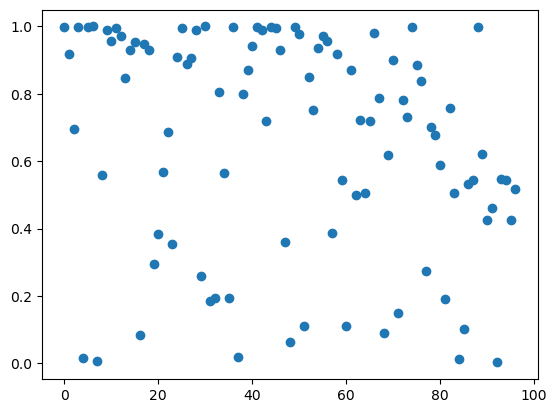

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from snownlp import SnowNLP

source = open("./data/emotion_article_data.txt", "r", encoding="utf-8")

line = source.readlines()

emotion_sentence = []
for i in line:
    s = SnowNLP(i)
    emotion_sentence.append(s.sentiments)

x = np.array(range(len(emotion_sentence)))
y = np.array(emotion_sentence)
print(y.shape)
plt.scatter(x, y)
plt.show()

15-19

Stopwords: ['、', '。', '〈', '〉', '《', '》', '一', '一个', '一些', '一何', '一切', '一则', '一方面', '一旦', '一来', '一样', '一种', '一般', '一转眼', '七', '万一', '三', '上', '上下', '下', '不', '不仅', '不但', '不光', '不单', '不只', '不外乎', '不如', '不妨', '不尽', '不尽然', '不得', '不怕', '不惟', '不成', '不拘', '不料', '不是', '不比', '不然', '不特', '不独', '不管', '不至于', '不若', '不论', '不过', '不问', '与', '与其', '与其说', '与否', '与此同时', '且', '且不说', '且说', '两者', '个', '个别', '中', '临', '为', '为了', '为什么', '为何', '为止', '为此', '为着', '乃', '乃至', '乃至于', '么', '之', '之一', '之所以', '之类', '乌乎', '乎', '乘', '九', '也', '也好', '也罢', '了', '二', '二来', '于', '于是', '于是乎', '云云', '云尔', '五', '些', '亦', '人', '人们', '人家', '什', '什么', '什么样', '今', '介于', '仍', '仍旧', '从', '从此', '从而', '他', '他人', '他们', '他们们', '以', '以上', '以为', '以便', '以免', '以及', '以故', '以期', '以来', '以至', '以至于', '以致', '们', '任', '任何', '任凭', '会', '似的', '但', '但凡', '但是', '何', '何以', '何况', '何处', '何时', '余外', '作为', '你', '你们', '使', '使得', '例如', '依', '依据', '依照', '便于', '俺', '俺们', '倘', '倘使', '倘或', '倘然', '倘若', '借', '借傥然', '假使', '假如', '假若', '做', '像', '儿', '先不先', '光', '光是

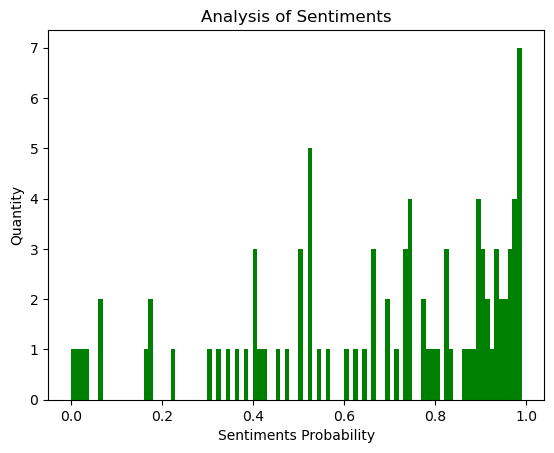

In [57]:
import codecs
import jieba.posseg as posseg

import matplotlib.pyplot as plt
import numpy as np
from snownlp import SnowNLP
import requests
from lxml import etree

import time

stop_words = "./data/stop_words.txt"
stop_words = codecs.open(stop_words, "r", encoding="utf8").readlines()
stop_words = [w.strip() for w in stop_words]
print("Stopwords:", stop_words, sep=" ")
stop_flag = ["x", "c", "u", "d", "p", "t", "uj", "m", "f", "r", "ul"]


class FileAnalyseUtils:
    def cut_stopwords(self, filename):
        result = []
        with open(filename, "r", encoding="UTF-8") as f:
            text = f.read()
            words = posseg.cut(text)
            for word, flag in words:
                if word not in stop_words and len(word) > 1:
                    result.append(word)
        return result

    def all_list(self, arr):
        result = {}
        for i in set(arr):
            result[i] = arr.count(i)
        return result

    def sentiments_analyse(self, path):
        f = open(path, "r", encoding="UTF-8")
        connects = f.readlines()
        sentiments_list = []

        sum = 0
        for i in connects:
            s = SnowNLP(i)
            sentiments_list.append(s.sentiments)
            if s.sentiments > 0.5:
                sum += 1
        print("Good rate count:%d" % sum)
        print("Total rate count:%d" % len(sentiments_list))

        plt.hist(sentiments_list, bins=np.arange(0, 1, 0.01), facecolor="g")
        plt.xlabel("Sentiments Probability")
        plt.ylabel("Quantity")
        plt.title("Analysis of Sentiments")
        plt.show()


def get_and_save_comment_data(num, path):
    comments = []
    headers = {
        "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36",
    }
    for i in range(num):
        print("Get for page:{}".format(i))
        url = "https://movie.douban.com/subject/30402296/comments?start={}&limit=20&status=P&sort=new_score".format(
            i * 20
        )
        r = requests.get(url, headers=headers)
        dom = etree.HTML(r.text)
        texts = dom.xpath("//*[@id='comments']/div/div[2]/p/span/text()")
        print("Page:{} contents:".format(i), texts)
        for i in texts:
            comments.append(i)

    with open(path, "w", encoding="utf-8") as f:
        for i in comments:
            f.write(i + "\n")
    return comments


if __name__ == "__main__":
    # Get front 30 pages

    path = "./data/movie_comments.txt"
    # print(get_and_save_comment_data(10, path))

    fileAnalyseUtils = FileAnalyseUtils()


    word_list = fileAnalyseUtils.cut_stopwords(path)
    word_count = fileAnalyseUtils.all_list(word_list)
    word_count = {k: v for k, v in word_count.items() if v >= 8}
    print(word_count)

    fileAnalyseUtils.sentiments_analyse(path)